In [ ]:
!pip install duckdb

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
import duckdb

In [ ]:
df=pd.read_csv('US  E-commerce records 2020 (1).csv', encoding='latin1')
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [ ]:
df.isnull().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df=df.drop_duplicates()
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

<ipython-input-5-e419b3dd7a76>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

print('Min date: {} \nMax date: {}'.format(df['Order Date'].min(), df['Order Date'].max()))
print('Time difference is: {}'.format(df['Order Date'].max() - df['Order Date'].min()))

Min date: 2020-01-01 00:00:00 
Max date: 2020-12-30 00:00:00
Time difference is: 364 days 00:00:00


In [ ]:
con = duckdb.connect()
con.register('df_table', df)

In [ ]:
con = duckdb.connect()
con.register('df_table', df)
result = con.execute("""
SELECT
    min("Order Date") as min_date,
    max("Order Date") as max_date
    ,max_date - min_date as time_difference
FROM df_table
""").fetchdf()

# Tính toán sự khác biệt thời gian
print(result)

    min_date   max_date time_difference
0 2020-01-01 2020-12-30        364 days


In [ ]:
con.execute("""
SELECT
    min("Order Date") as min_date,
    max("Order Date") as max_date
    ,max_date - min_date as time_difference
FROM df_table
""").fetchdf()

,min_date,max_date,time_difference
0,2020-01-01,2020-12-30,364 days


In [ ]:
cohort = con.execute("""
with first_month as(
SELECT
    "Customer ID",
    min("Order Date") as First_Trans_Month
FROM df_table
group by "Customer ID"),
data1 as (select a."Customer ID"
,  DATE_PART('year', "Order Date") || '-' || DATE_PART('month', "Order Date") || '-' || 01 AS " Trans Month"
, DATE_PART('year', b.First_Trans_Month) || '-' || DATE_PART('month', b.First_Trans_Month) || '-' || 01 AS "First_Trans_Month"
, date_part('month', a."Order Date") - date_part('month', b.First_Trans_Month) as Month_Diff
from df_table a
left join first_month b
on a."Customer ID" = b."Customer ID")
select First_Trans_Month, Month_Diff, count(distinct "Customer ID") as No_Cus
from data1
group by First_Trans_Month, Month_Diff
order by First_Trans_Month
""").fetchdf()
cohort

,First_Trans_Month,Month_Diff,No_Cus
0,2020-1-1,7,19
1,2020-1-1,4,7
2,2020-1-1,0,96
3,2020-1-1,3,23
4,2020-1-1,5,13
...,...,...,...
73,2020-8-1,1,5
74,2020-9-1,1,9
75,2020-9-1,2,15
76,2020-9-1,0,48


In [ ]:
cohort['First_Trans_Month'] = pd.to_datetime(cohort['First_Trans_Month'])

In [ ]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First_Trans_Month  78 non-null     datetime64[ns]
 1   Month_Diff         78 non-null     int64         
 2   No_Cus             78 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.0 KB


In [ ]:
pivot_df = cohort.pivot(index='First_Trans_Month', columns='Month_Diff', values='No_Cus').sort_index()
pivot_df

Month_Diff,0,1,2,3,4,5,6,7,8,9,10,11
First_Trans_Month,,,,,,,,,,,,
2020-01-01,96.0,10.0,18.0,23.0,7.0,13.0,11.0,19.0,22.0,13.0,17.0,19.0
2020-02-01,90.0,13.0,13.0,8.0,11.0,15.0,15.0,18.0,15.0,23.0,15.0,NaN
2020-03-01,111.0,24.0,13.0,17.0,18.0,10.0,22.0,17.0,26.0,20.0,NaN,NaN
2020-04-01,65.0,14.0,14.0,11.0,12.0,19.0,11.0,18.0,14.0,NaN,NaN,NaN
2020-05-01,63.0,9.0,7.0,10.0,10.0,9.0,19.0,13.0,NaN,NaN,NaN,NaN
2020-06-01,56.0,6.0,12.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,42.0,9.0,9.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,29.0,5.0,6.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,48.0,9.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_data = con.execute("""
with pre_cohort as(
  select First_Trans_Month, No_Cus as New_Cus
from cohort
where Month_Diff = 0
order by First_Trans_Month)
select a.First_Trans_Month, a.Month_Diff,a.No_Cus, b.New_Cus
from cohort a
left join pre_cohort b
on a.First_Trans_Month = b.First_Trans_Month
order by a.First_Trans_Month,a.Month_Diff
""").fetchdf()
final_data


,First_Trans_Month,Month_Diff,No_Cus,New_Cus
0,2020-01-01,0,96,96
1,2020-01-01,1,10,96
2,2020-01-01,2,18,96
3,2020-01-01,3,23,96
4,2020-01-01,4,7,96
...,...,...,...,...
73,2020-10-01,1,10,41
74,2020-10-01,2,4,41
75,2020-11-01,0,29,29
76,2020-11-01,1,5,29


In [ ]:
df_cohort = con.execute("""
select First_Trans_Month, Month_Diff,No_Cus, New_Cus, (No_Cus/New_Cus) as Retention_Rate
from final_data
""").fetchdf()


In [ ]:
COHORT = df_cohort.pivot(index='First_Trans_Month', columns='Month_Diff', values='Retention_Rate')

COHORT.index = COHORT.index.strftime("%Y-%m")

COHORT

Month_Diff,0,1,2,3,4,5,6,7,8,9,10,11
First_Trans_Month,,,,,,,,,,,,
2020-01,1.0,0.104167,0.187500,0.239583,0.072917,0.135417,0.114583,0.197917,0.229167,0.135417,0.177083,0.197917
2020-02,1.0,0.144444,0.144444,0.088889,0.122222,0.166667,0.166667,0.200000,0.166667,0.255556,0.166667,NaN
2020-03,1.0,0.216216,0.117117,0.153153,0.162162,0.090090,0.198198,0.153153,0.234234,0.180180,NaN,NaN
2020-04,1.0,0.215385,0.215385,0.169231,0.184615,0.292308,0.169231,0.276923,0.215385,NaN,NaN,NaN
2020-05,1.0,0.142857,0.111111,0.158730,0.158730,0.142857,0.301587,0.206349,NaN,NaN,NaN,NaN
2020-06,1.0,0.107143,0.214286,0.232143,0.178571,0.214286,0.196429,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.214286,0.214286,0.095238,0.166667,0.119048,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.172414,0.206897,0.172414,0.241379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.187500,0.312500,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


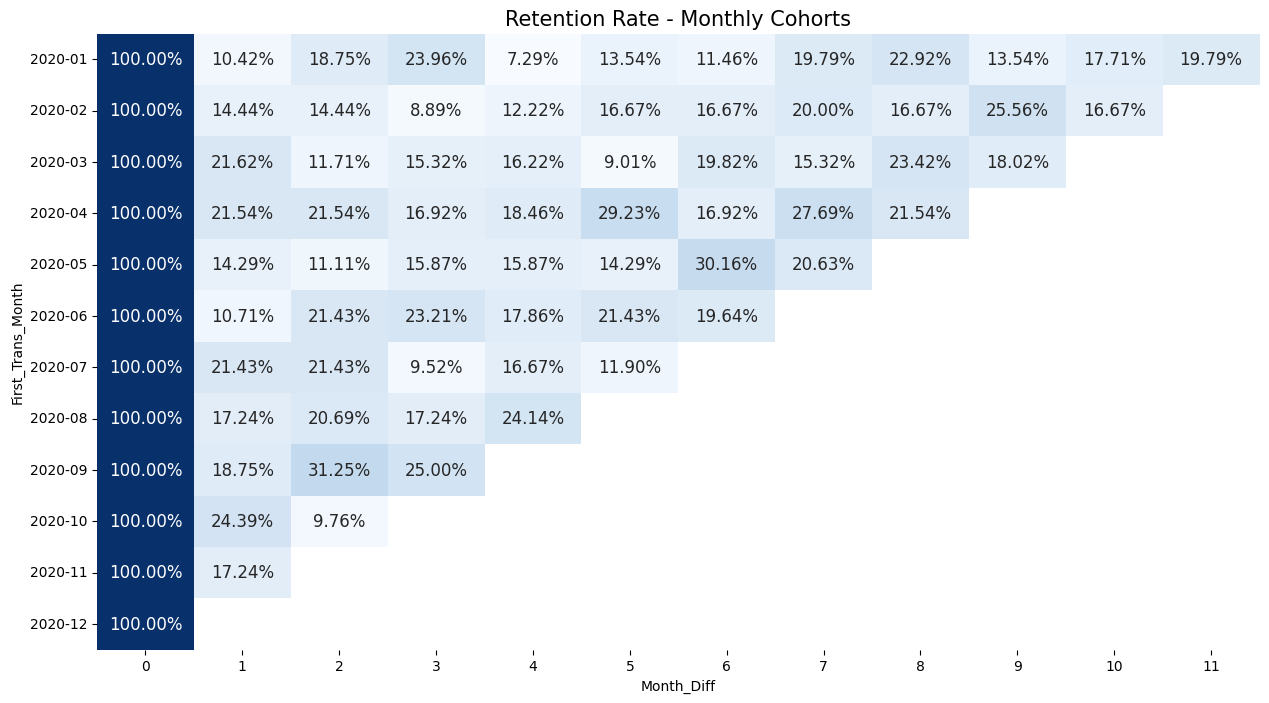

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(figsize = (15, 8))

sns.heatmap(COHORT, cmap='Blues', annot=True, fmt='.2%', annot_kws={'fontsize': 12}, cbar=False, ax=ax)

plt.title('Retention Rate - Monthly Cohorts', fontsize=15)
plt.yticks(rotation = 0)
plt.show()